# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
%%bash
pip install --upgrade --force-reinstall pip
pip install tensorflow-tensorboard==0.1.8
mv /opt/conda/lib/libcudnn.so /opt/conda/lib/libcudnn.so.in

  Using cached pip-21.2.2-py3-none-any.whl (1.6 MB)
  Attempting uninstall: pip
    Found existing installation: pip 21.2.2
    Uninstalling pip-21.2.2:
      Successfully uninstalled pip-21.2.2
  Using cached tensorflow_tensorboard-0.1.8-py3-none-any.whl (1.6 MB)
  Attempting uninstall: tensorflow-tensorboard
    Found existing installation: tensorflow-tensorboard 0.1.5
    Uninstalling tensorflow-tensorboard-0.1.5:
      Successfully uninstalled tensorflow-tensorboard-0.1.5


In [2]:
%%bash
pip uninstall -y dlib

git clone https://github.com/davisking/dlib.git
cd dlib
cp ../cudnn_dlibapi.cpp dlib/cuda/cudnn_dlibapi.cpp
cp ../CMakeLists.txt dlib/CMakeLists.txt

python setup.py install --set USE_AVX_INSTRUCTIONS=1 --set DLIB_USE_CUDA=1
rm -r ../dlib

running install
running bdist_egg
running egg_info
writing tools/python/dlib.egg-info/PKG-INFO
writing dependency_links to tools/python/dlib.egg-info/dependency_links.txt
writing top-level names to tools/python/dlib.egg-info/top_level.txt
reading manifest file 'tools/python/dlib.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
writing manifest file 'tools/python/dlib.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
running build_ext
Building extension for Python 3.6.3 | packaged by conda-forge | (default, Dec  9 2017, 04:28:46) 
Invoking CMake setup: 'cmake /home/workspace/dog_project/dlib/tools/python -DCMAKE_LIBRARY_OUTPUT_DIRECTORY=/home/workspace/dog_project/dlib/build/lib.linux-x86_64-3.6 -DPYTHON_EXECUTABLE=/opt/conda/bin/python -DUSE_AVX_INSTRUCTIONS=1 -DDLIB_USE_CUDA=1 -DCMAKE_BUILD_TYPE=Release'
-- Found PythonInterp: /opt/conda/bin/python (found version "3.6.3") 
-- Found PythonLibs: /opt/conda/lib

fatal: destination path 'dlib' already exists and is not an empty directory.
package init file 'tools/python/dlib/__init__.py' not found (or not a regular file)
no previously-included directories found matching 'tools/python/build*'


In [3]:
import sys
dlib_path = '/opt/conda/lib/python3.6/site-packages/dlib-19.22.99-py3.6-linux-x86_64.egg'
sys.path.append(dlib_path)

from importlib import util
spec = util.spec_from_file_location('dlib', dlib_path + '/dlib/__init__.py')
dlib = util.module_from_spec(spec)
spec.loader.exec_module(dlib)

In [4]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


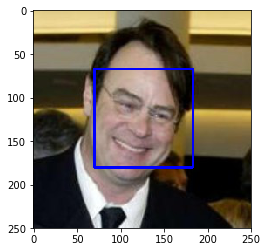

In [5]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [6]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (256, 256), interpolation=cv2.INTER_AREA)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)
- What percentage of the first 100 images in human_files have a detected human face? __0.97__
- What percentage of the first 100 images in dog_files have a detected human face? __0.06__

In [7]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
faces_in_humans, faces_in_dogs = 0, 0

for i in tqdm(range(100)):
    if face_detector(human_files_short[i]):
        faces_in_humans += 1

    if face_detector(dog_files_short[i]):
        faces_in_dogs += 1

print('What percentage of the first 100 images in human_files have a detected human face?', faces_in_humans / 100)
print('What percentage of the first 100 images in dog_files have a detected human face?', faces_in_dogs / 100)

100%|██████████| 100/100 [00:07<00:00, 12.91it/s]

What percentage of the first 100 images in human_files have a detected human face? 0.97
What percentage of the first 100 images in dog_files have a detected human face? 0.06


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

__Answer (DLIBCNN):__
- What percentage of the first 100 images in human_files have a detected human face? __1.0__
- What percentage of the first 100 images in dog_files have a detected human face? __0.0__

In [8]:
### (Optional) 
### TODO: Test performance of another face detection algorithm.
### Feel free to use as many code cells as needed.
from dlib import cnn_face_detection_model_v1, DLIB_USE_CUDA

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

detector = cnn_face_detection_model_v1('mmod_human_face_detector.dat')

def DLIBCNN_face_detector(img_path, upsample=0):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (256, 256), interpolation=cv2.INTER_AREA)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = detector(img, upsample)
    
    return len(faces) > 0

faces_in_humans, faces_in_dogs = 0, 0

for i in tqdm(range(100)):
    if DLIBCNN_face_detector(human_files_short[i]):
        faces_in_humans += 1

    if DLIBCNN_face_detector(dog_files_short[i]):
        faces_in_dogs += 1

print('What percentage of the first 100 images in human_files have a detected human face?', faces_in_humans / 100)
print('What percentage of the first 100 images in dog_files have a detected human face?', faces_in_dogs / 100)

100%|██████████| 100/100 [00:04<00:00, 20.54it/s]

What percentage of the first 100 images in human_files have a detected human face? 1.0
What percentage of the first 100 images in dog_files have a detected human face? 0.0


---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [9]:
import torch
from torchvision import models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:04<00:00, 114824114.26it/s]


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](https://pytorch.org/vision/stable/models.html).

In [10]:
from PIL import Image
from torchvision import transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    img = Image.open(img_path)
    
    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
    ])
    
    img = preprocess(img)[:3,:,:].unsqueeze(0)
    
    if use_cuda:
        img = img.cuda()
    
    VGG16.eval()
    with torch.no_grad():
        output = VGG16(img)
    
    return output # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [11]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    output = VGG16_predict(img_path)
    pred = output.max(dim=1)[1]
    
    return True if pred >= 151 and pred <= 268 else False # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 
- What percentage of the images in human_files_short have a detected dog? __0.0__
- What percentage of the images in dog_files_short have a detected dog? __1.0__

In [12]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

dogs_in_humans, dogs_in_dogs = 0, 0

for i in tqdm(range(100)):
    if dog_detector(human_files_short[i]):
        dogs_in_humans += 1

    if dog_detector(dog_files_short[i]):
        dogs_in_dogs += 1

print('What percentage of the images in human_files_short have a detected dog?', dogs_in_humans / 100)
print('What percentage of the images in dog_files_short have a detected dog?', dogs_in_dogs / 100)

100%|██████████| 100/100 [00:07<00:00, 15.17it/s]

What percentage of the images in human_files_short have a detected dog? 0.0
What percentage of the images in dog_files_short have a detected dog? 1.0


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

__Answer (Inception v3):__ 
- What percentage of the images in human_files_short have a detected dog? __0.0__
- What percentage of the images in dog_files_short have a detected dog? __1.0__

In [13]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.
human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

InceptionV3 = models.inception_v3(pretrained=True)

if use_cuda:
    InceptionV3 = InceptionV3.cuda()

def InceptionV3_predict(img_path):
    img = Image.open(img_path)
    
    preprocess = transforms.Compose([
        transforms.Resize(340),
        transforms.CenterCrop(299),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
    ])
    
    img = preprocess(img)[:3,:,:].unsqueeze(0)
    
    if use_cuda:
        img = img.cuda()
    
    InceptionV3.eval()
    with torch.no_grad():
        output = InceptionV3(img)
        
    return output

def InceptionV3_dog_detector(img_path):
    ## TODO: Complete the function.
    output = InceptionV3_predict(img_path)
    pred = output.max(dim=1)[1]
    
    return True if pred >= 151 and pred <= 268 else False

dogs_in_humans, dogs_in_dogs = 0, 0

for i in tqdm(range(100)):
    if InceptionV3_dog_detector(human_files_short[i]):
        dogs_in_humans += 1

    if InceptionV3_dog_detector(dog_files_short[i]):
        dogs_in_dogs += 1

print('What percentage of the images in human_files_short have a detected dog?', dogs_in_humans / 100)
print('What percentage of the images in dog_files_short have a detected dog?', dogs_in_dogs / 100)

Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.torch/models/inception_v3_google-1a9a5a14.pth
100%|██████████| 100/100 [00:07<00:00, 13.98it/s]

What percentage of the images in human_files_short have a detected dog? 0.0
What percentage of the images in dog_files_short have a detected dog? 1.0


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [14]:
from torchvision import datasets
from torch.utils.data import DataLoader

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

test_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

train_data = datasets.ImageFolder('/data/dog_images/train', train_transform)
valid_data = datasets.ImageFolder('/data/dog_images/valid', test_transform)
test_data = datasets.ImageFolder('/data/dog_images/test', test_transform)

batch_size = 32

loaders_scratch = {}
loaders_scratch['train'] = DataLoader(train_data, batch_size, shuffle=True)
loaders_scratch['valid'] = DataLoader(valid_data, batch_size, shuffle=True)
loaders_scratch['test'] = DataLoader(test_data, batch_size, shuffle=True)

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:
- How does your code resize the images (by cropping, stretching, etc)? What size did you pick for the input tensor, and why?<br>
  __My code resizes the images by resizing them to 256x256 and cropping them to 224x224 at the center.__
  __I pick 224x224 for the input tensor since this model is based on a ResNet architecture which needs to take 224x224 as input size.__


- Did you decide to augment the dataset? If so, how (through translations, flips, rotations, etc)? If not, why not?<br>
  __Yes, I augment the dataset by random resized cropping and random horizontal flip.__

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [15]:
from torch import nn

class BasicBlock(nn.Module):
    def __init__(self, in_planes, planes, stride=1, downsample=None):
        super(BasicBlock, self).__init__()
        
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.relu = nn.ReLU(inplace=True)
        
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)
        
        self.downsample = downsample
        
    def forward(self, x):
        identity = x
        
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        
        if self.downsample is not None:
            identity = self.downsample(x)
        
        out += identity
        out = self.relu(out)
        
        return out

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    r"""ResNet-alike Model inspired from 
    `"Deep Residual Learning for Image Recognition" <https://arxiv.org/pdf/1512.03385.pdf>`_.
    """
    def __init__(self, Block=BasicBlock, blocks=[2, 3, 5, 2], num_classes=133):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.planes = 64
        
        self.conv = nn.Conv2d(3, self.planes, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn = nn.BatchNorm2d(self.planes)
        self.relu = nn.ReLU(inplace=True)
        self.pool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        
        self.layer1 = self._init_layer(Block, 64, blocks[0])
        self.layer2 = self._init_layer(Block, 128, blocks[1], stride=2)
        self.layer3 = self._init_layer(Block, 256, blocks[2], stride=2)
        self.layer4 = self._init_layer(Block, 512, blocks[3], stride=2)
        
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, num_classes)
        
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, BasicBlock):
                nn.init.constant_(m.bn2.weight, 0)
 
    def _init_layer(self, Block, out_planes, num_blocks, stride=1): 
        downsample = None
        
        if self.planes != out_planes:
            downsample = nn.Sequential(
                nn.Conv2d(self.planes, out_planes, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_planes)
            )
            
        layers = []
        layers.append(Block(self.planes, out_planes, stride, downsample))
        
        self.planes = out_planes
        for _ in range(1, num_blocks):
            layers.append(Block(self.planes, out_planes))
        
        return nn.Sequential(*layers)

    def forward(self, x):
        ## Define forward behavior
        x = self.conv(x)
        x = self.bn(x)
        x = self.relu(x)
        x = self.pool(x)
        
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        
        x = self.avgpool(x)
        x = x.view(x.shape[0], -1)
        x = self.fc(x)
        
        return x

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__
- __My CNN architecture is similar to ResNet.__


- __The first stage is a combination of a convolution (Conv), the batch normalization (BN), the relu function (ReLU) and a max pooling. This stage consists of standard steps to extract features in images by convolutional neural networks. The introduction of BN is to hasten and stabilize training.__


- __The second stage is composed of four layers. Each layer contains several residual blocks, [2, 3, 5, 2] in this case. Each residual block includes a combination of Conv, BN, ReLU, Conv, BN, a skip connection adding inputs to the output of the 2nd BN, and ReLU. If input dimensions are different from output ones in a block, inputs need to be downsampled. Downsampling involves 1x1 Conv and BN.__


- __The final stage comprises an adaptive average pooling and a linear transformation. The introduction of the adaptive average pooling is to automatically calculate a correct kernel size, given an input dimensionality.__

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [16]:
from torch import optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.01, momentum=0.9, weight_decay=0.0001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [17]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            optimizer.zero_grad()
            
            output = model(data)
            loss = criterion(output, target)
            
            loss.backward()
            optimizer.step()
            
            train_loss += (loss.item() - train_loss) / (batch_idx + 1)
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        
        with torch.no_grad():
            for batch_idx, (data, target) in enumerate(loaders['valid']):
                # move to GPU
                if use_cuda:
                    data, target = data.cuda(), target.cuda()
                ## update the average validation loss
                output = model(data)
                loss = criterion(output, target)

                valid_loss += (loss.item() - valid_loss) / (batch_idx + 1)
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
                valid_loss_min,
                valid_loss
            ))
            
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model

# train the model
model_scratch = train(20, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 4.892964 	Validation Loss: 5.432711
Validation loss decreased (inf --> 5.432711).  Saving model ...
Epoch: 2 	Training Loss: 4.553720 	Validation Loss: 4.398659
Validation loss decreased (5.432711 --> 4.398659).  Saving model ...
Epoch: 3 	Training Loss: 4.404665 	Validation Loss: 4.456324
Epoch: 4 	Training Loss: 4.280447 	Validation Loss: 4.179412
Validation loss decreased (4.398659 --> 4.179412).  Saving model ...
Epoch: 5 	Training Loss: 4.172366 	Validation Loss: 4.070582
Validation loss decreased (4.179412 --> 4.070582).  Saving model ...
Epoch: 6 	Training Loss: 4.052973 	Validation Loss: 4.103506
Epoch: 7 	Training Loss: 3.923269 	Validation Loss: 4.151731
Epoch: 8 	Training Loss: 3.832988 	Validation Loss: 3.783080
Validation loss decreased (4.070582 --> 3.783080).  Saving model ...
Epoch: 9 	Training Loss: 3.703630 	Validation Loss: 3.538903
Validation loss decreased (3.783080 --> 3.538903).  Saving model ...
Epoch: 10 	Training Loss: 3.583816 	Valida

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [18]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    
    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(loaders['test']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the loss
            loss = criterion(output, target)
            # update average test loss 
            test_loss += (loss.item() - test_loss) / (batch_idx + 1)
            # convert output probabilities to predicted class
            pred = output.max(dim=1)[1]
            # compare predictions to true label
            correct += np.sum(np.squeeze(pred.eq(target.view_as(pred))).cpu().numpy())
            total += data.size(0)

    print('Test Loss: {:.6f}\n'.format(test_loss))
    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 2.821662


Test Accuracy: 28% (235/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [19]:
## TODO: Specify data loaders
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

test_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

train_data = datasets.ImageFolder('/data/dog_images/train', train_transform)
valid_data = datasets.ImageFolder('/data/dog_images/valid', test_transform)
test_data = datasets.ImageFolder('/data/dog_images/test', test_transform)

batch_size = 32

loaders_transfer = {}
loaders_transfer['train'] = DataLoader(train_data, batch_size, shuffle=True)
loaders_transfer['valid'] = DataLoader(valid_data, batch_size, shuffle=True)
loaders_transfer['test'] = DataLoader(test_data, batch_size, shuffle=True)

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [20]:
## TODO: Specify model architecture 
model_transfer = models.resnet101(pretrained=True)

block_expansion = 4
num_classes = 133

model_transfer.fc = nn.Sequential(
    nn.Linear(512 * block_expansion, num_classes)
)

if use_cuda:
    model_transfer = model_transfer.cuda()

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.torch/models/resnet101-5d3b4d8f.pth
100%|██████████| 178728960/178728960 [00:01<00:00, 94077891.59it/s]


__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
- __My CNN architecture applies a pre-trained ResNet-101 model, and the output dimension of the linear transformation of the model is modified to accord with the number of dog breeds.__


- __I think the architecture is suitable for the current problem since the ResNet-101 model is pre-trained on ImageNet. Features detected in images of dog breeds may correlate highly with features extracted from ImageNet.__

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [21]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.fc.parameters(), lr=0.01, momentum=0.9, weight_decay=0.0001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [22]:
# train the model
model_transfer = train(10, loaders_transfer, model_transfer, optimizer_transfer,
                       criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 2.364352 	Validation Loss: 0.737237
Validation loss decreased (inf --> 0.737237).  Saving model ...
Epoch: 2 	Training Loss: 1.079349 	Validation Loss: 0.504251
Validation loss decreased (0.737237 --> 0.504251).  Saving model ...
Epoch: 3 	Training Loss: 0.922024 	Validation Loss: 0.426817
Validation loss decreased (0.504251 --> 0.426817).  Saving model ...
Epoch: 4 	Training Loss: 0.811903 	Validation Loss: 0.449744
Epoch: 5 	Training Loss: 0.780818 	Validation Loss: 0.433616
Epoch: 6 	Training Loss: 0.751410 	Validation Loss: 0.394797
Validation loss decreased (0.426817 --> 0.394797).  Saving model ...
Epoch: 7 	Training Loss: 0.687159 	Validation Loss: 0.379488
Validation loss decreased (0.394797 --> 0.379488).  Saving model ...
Epoch: 8 	Training Loss: 0.666231 	Validation Loss: 0.433999
Epoch: 9 	Training Loss: 0.642425 	Validation Loss: 0.366680
Validation loss decreased (0.379488 --> 0.366680).  Saving model ...
Epoch: 10 	Training Loss: 0.662052 	Valida

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [23]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.470791


Test Accuracy: 86% (723/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [24]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in train_data.classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    img = Image.open(img_path).convert('RGB')
    img = test_transform(img).unsqueeze(0)
    
    if use_cuda:
        img = img.cuda()

    model_transfer.eval()
    
    with torch.no_grad():
        output = model_transfer(img)
        pred = output.max(dim=1)[1]
    
    return class_names[pred]

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [25]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    img = Image.open(img_path).convert('RGB')
    plt.imshow(img)
    plt.show()
    
    if DLIBCNN_face_detector(img_path):
        print(f'Hello, human!\nYou look like a ...\n{predict_breed_transfer(img_path)}\n')
    elif InceptionV3_dog_detector(img_path):
        print(f'Hello, dog!\nYour predicted breed is ...\n{predict_breed_transfer(img_path)}\n') 
    else:
        print('Neither dogs nor humans are detected in the image ...\n')

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)
- __Yes, the output is better than I expected.__


- __Three possible points for improvement:__<br>
  __1. Change the pre-trained model from ResNet-101 to ResNet-152.__<br>
  __2. Enlarge the batch size from 32 to 256.__<br>
  __3. Apply label smoothing.__

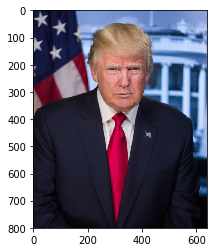

Hello, human!
You look like a ...
Poodle



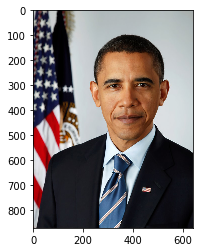

Hello, human!
You look like a ...
Poodle



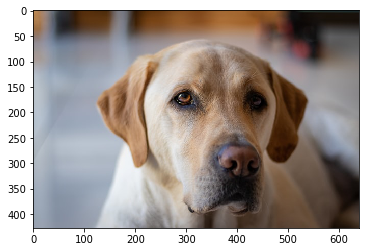

Hello, dog!
Your predicted breed is ...
Labrador retriever



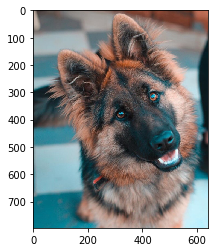

Hello, dog!
Your predicted breed is ...
German shepherd dog



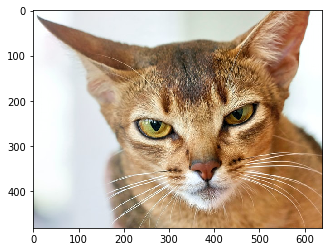

Neither dogs nor humans are detected in the image ...



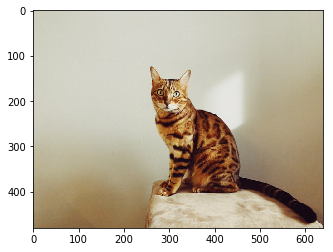

Neither dogs nor humans are detected in the image ...



In [26]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
human_files = np.array(glob('images/test/human/*'))
dog_files = np.array(glob('images/test/dog/*'))
cat_files = np.array(glob('images/test/cat/*'))

for file in np.hstack((human_files, dog_files, cat_files)): run_app(file)